# Boston Housing Prices Final Report

## <u>Team Member Summary<u>

**Sam Cropman**:

**Jonathan Lee**: 

**Zihan Yu**:

**Zhihong Chen**:

**Jinrong Zhang**:
      

## <u>The Project Goal and Data<u>

The goal of the Boston Housing Project was to consider many variables associated with housing in 1978 Boston, to ultimately employ machine learning to create a model that is able to predict accurate Boston Housing prices, based off these variables. 
    
To accomplish this we had deconstructed our goal into a list of simple steps  that would ultimately help us on achieving an accurate model and improving our programming knowledge overall.
    
<b>1.</b> Simplify the data into a presentable format we can easily understand.
    
<b>2.</b> Clean the data to remove any values that may negaitvely affect or abnormally skew the modelling of our data.
    
<b>3.</b> Investigate the association and correlation between every individual and price, then removing any blatantly unassociated variables from the dataset.
    
<b>4.</b> Create a model that can predict `PRICES`, then create many different individual models that can also predict PRICE, with each model missing one of the housing variables. Then testing accuracy of each one of those models. This will allow us to see how crucial/correlated each housing variable is to determining the housing price value.
    
<b>5.</b> Once all the unassociated and outlying variables are removed. All that is left is to refine the model's accuracy. In this case we cross-validated our model multiple times to discover our models true accuracy.
 

The data provided to aid us in creating the model was collected in 1978, it contained a 506 row by 14 column data table compacted to a csv file. The first row, contained all 14 housing associated variables. Whilst each following row detailed the housing associated values for an individual Boston suburb or town. In this situation, the variable that we were trying to create a model to predict/the dependant variable were the Boston Housing Prices, which was represented by the `PRICE` variable.

The variables and their meanings are listed below:<br>
</br>**CRIM** per capita crime rate by town

**ZN** proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS** proportion of non-retail business acres per town

**CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX** nitric oxides concentration (parts per 10 million)

**RM** average number of rooms per dwelling

**AGE** proportion of owner-occupied units built prior to 1940

**DIS** weighted distances to five Boston employment centres

**RAD** index of accessibility to radial highways

**TAX** full-value property-tax rate per 10,000usd

**PTRATIO** pupil-teacher ratio by town

**B** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT % lower status of the population

**PRICE** Median value of owner-occupied homes in $1000s


Below is the data for our project in its raw form. In order to extract meaningful insights from this data, we had to prepare it into a more coherent form.
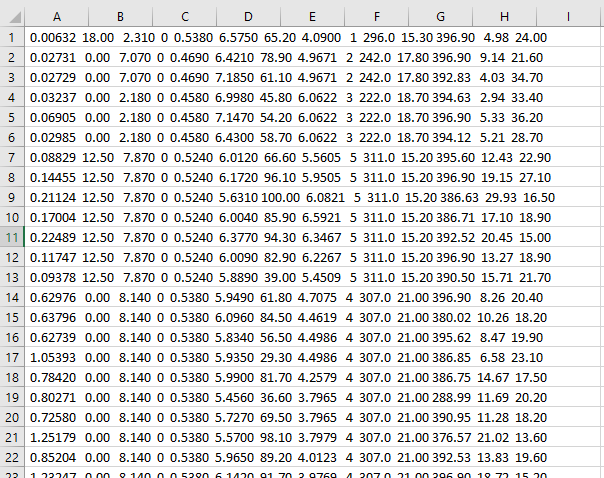

<br> 
    <br> 
    <br> 
    <br> 
   </br>
    
## <u>Data Preparation<u>
Our initial step was to first prepare and visualise the data in a simple format. This involved importing the pandas library and dataset from Sklearn, we converted the dataset into a visually appealing and easily comprehensible dataframe. 

 

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The next task was to then drop missing values that might hinder out modelling.
aswell as renaming all the columns with their respectful variables, since the imported data was entirely numerical.
Lastly, we had to import the missing `PRICE` column from sklearn.

In [3]:
data.columns = boston.feature_names
data = data.dropna()
data['PRICE'] = boston.target 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<br> 
    <br> 
    <br> 
    <br> 
    
</br>

## <u>Initial Data Visualisations and Manipulations </u>
To provide ourselves with insight into the correlations and associations between each variable in a visual fashion, we decided to visualize the correlations of the variables as a heatmap. To carry out this visualiastion, we had to import the seaborn and matploblib libraries to aid us.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
corr = data.corr()
corr.shape

(14, 14)

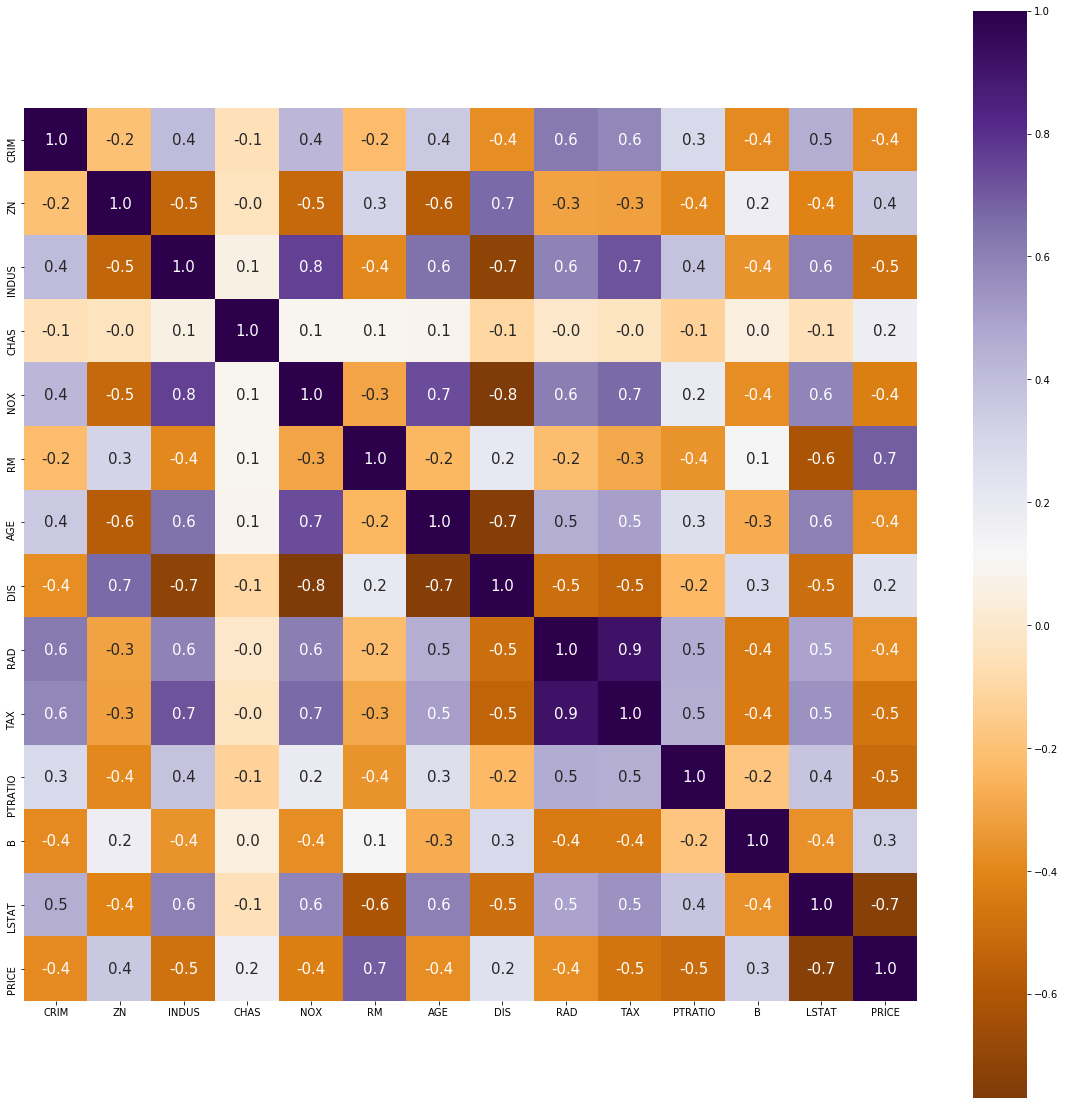

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,
            linewidths=0, 
            cbar=True, 
            square=True, 
            fmt='.1f',
            annot=True, 
            annot_kws={'size':15}, 
            cmap='PuOr')

This heatmap gave us a general idea of interactions between each of the Boston Housing variables and price. Such as how some  variables were negatively correlated with price whilst other were positively correlated.
<br>
<br>
<br>
<br>
</br>

## <u> Variable Eliminations</u>
In creating the heatmap, we had observed that the variables `CHAS` and `B` appeared as outliers. As they shared little association to `PRICE` and the other housing variables, as expressed by their near 0 value of correlation. 

But to confirm and validate our assumption, we decided to do further modelling. So we plotted every individual variable against price as simple scatterplots. Then we used the combined information regarding the variables correlation, gathered from both the heatmap and the scatterplot, to validate the association of the variable, determining whether it was a crucial factor to `PRICE`, or whether it should be revmoed due to a deficit of any correlation to `PRICE`. Since any unassociated variables would only of functioned to distort our prediction capabilities.

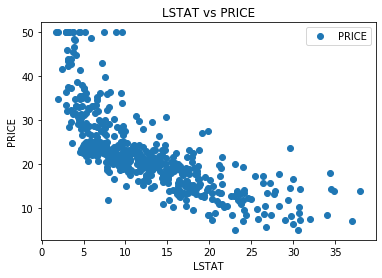

In [7]:
data.plot(x='LSTAT', y='PRICE', style='o')  
plt.title('LSTAT vs PRICE')  
plt.xlabel('LSTAT')  
plt.ylabel('PRICE')  
plt.show()

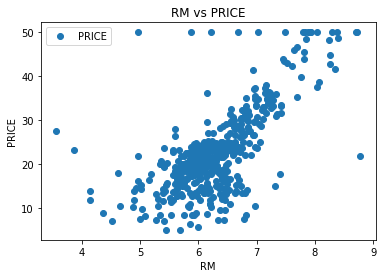

In [8]:
data.plot(x='RM', y='PRICE', style='o')  
plt.title('RM vs PRICE')  
plt.xlabel('RM')  
plt.ylabel('PRICE')  
plt.show()

As observed, variables such as `RM` and `LSTAT` shared significant association to `PRICE` in the scatterplots and on the heatmap, with the RM variable clearly conveying on the scatterplot, that as `PRICE` decreased, then `RM` followed, supporting the negative correlation shown in the heatmap.

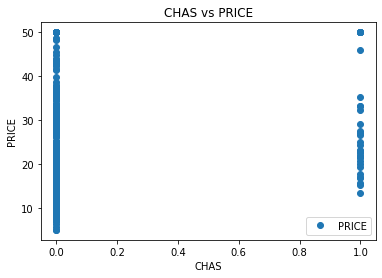

In [9]:
data.plot(x='CHAS', y='PRICE', style='o')  
plt.title('CHAS vs PRICE')  
plt.xlabel('CHAS')  
plt.ylabel('PRICE')  
plt.show()

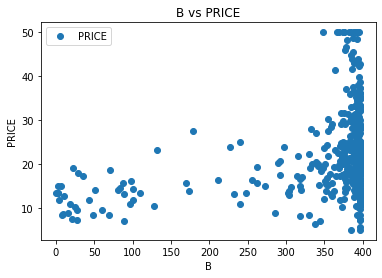

In [10]:

data.plot(x='B', y='PRICE', style='o')  
plt.title('B vs PRICE')  
plt.xlabel('B')  
plt.ylabel('PRICE')  
plt.show()

On the other hand, the random arrangment of points on the scatterplot with no discernable pattern, exposes that the variables `CHAS` and `B` lacked any correlation to `PRICE` to suggest that they are associated with `PRICE`. 
<br>
<br>
</br>
Hence, due to their blatant lack of association and correlation to `PRICE` as supported by the heatmap and their scatterplots, we decided to eliminate them to simplify our dataset and prevent any anomalous values from skewing our data.



In [11]:
data.drop(['B'], axis = 1)
data.drop(['CHAS'], axis = 1)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<br> 
    <br> 
    <br> 
    <br> 
    
</br>


## <u>Early Model Development</u>
Initially, we determined that with the removal of the obvious outliers (`B` and `CHAS`), that it was safe to finally create a price prediction model from our dataset.

For our first model we established that a linear regression model would best suite our data due to it's entirely numerical nature, aswell as the correlations existing between each remaining variable and price, as expressed in the heatmap and scatterplots. 

To accomplish this task we had to employ the use of many different libraries, mainly being the linear regression tools from sklearn. 

In [12]:
import numpy as np  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

Since we were using the remaining eleven variables to predict the `PRICE` variable, the 11 housing variables were set as the `X` set, whilst PRICE was set as the `y` set.

In [13]:
X = data[['CRIM','ZN', 'INDUS', 'NOX', 'RM', 'AGE', 
          'DIS', 'RAD', 'TAX', 'PTRATIO','LSTAT']]
y = data['PRICE']

To initialize our model, we had to split  a portion of the data into a training set that would be used to create the linear regression prediction algorithms, whilst the remaining testing data would be used to refine the trained model and adjust the hyperparameters of the algorithm created by the training set. 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
CRIM,-0.127998
ZN,0.058619
INDUS,0.044628
NOX,-20.984245
RM,2.869180
AGE,0.009244
DIS,-1.509110
RAD,0.317163
TAX,-0.012520
PTRATIO,-1.005253


In [16]:
y_pred = regressor.predict(X_test)

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
307,28.2,32.802932
343,23.9,28.020810
47,16.6,18.110790
67,22.0,21.529067
362,20.8,18.939236
132,23.0,20.121017
292,27.9,32.584809
31,14.5,18.296774
218,21.5,22.488352
90,22.6,27.097170


To view the accuracy of our created model in a more systematic manner, we created visualiastions of the predicted PRICE values from our linear regression model vs the actual PRICE values, allowing us to observe the accuracy of our model in a qualitative manner.

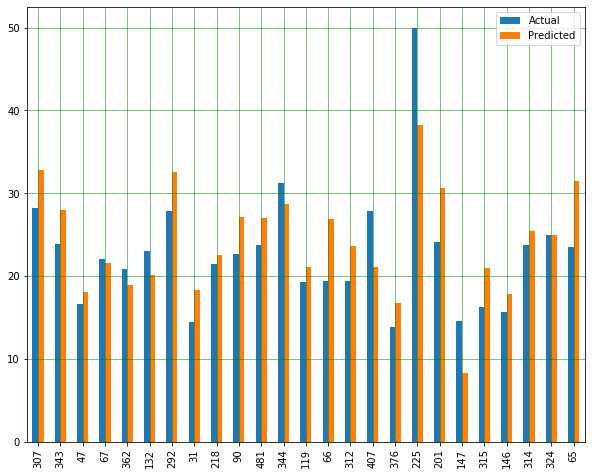

In [18]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

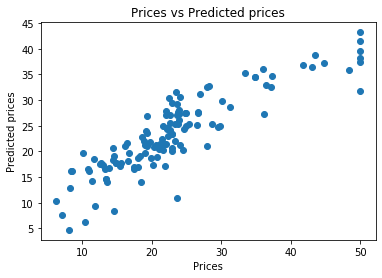

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

The two visualisations above informed us that our model was atleast reasonably viable to make price predictions, but still lacking in accuracy. Therefore, to determine the exact accuracy of our model, we elected the model's Root Mean Square Error value as the true determinant of it's accuracy.

The Root Mean Square Error (RMSE) was the square root of the mean squared errors of the model. With the Mean Squared Errors being a measure of the average squared difference between the predicted PRICE values and the actual PRICE value. The average difference being squared to remove any negative values.

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.7145358684156893
Mean Squared Error: 23.52701634550833
Root Mean Squared Error: 4.850465580282817


The Root Mean Square error of our first proper model being 4.85, is slightly greater than 21.52% of our mean PRICE being 22.53. This told is that the predicted values output by our model, generally deviated by 21.52% from the actual PRICE values. Revealing our model to not be exactly accurate, but still dependable at making valid predictions.

Below is where you will find the mean value for PRICE.

In [21]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<br> 
    <br> 
    <br> 
    <br> 
    
</br>

## <u>Further Variable Analysis</u>
To further investigate each housing variable, we decided to study how the removal of any of the housing variables would affect the models prediction capabilites.

The execution of this endeavour involved creating 11 models, each with a different housing variable removed. Then reviewing the Root Mean Squared errors for each of these models to decide whether that variable is harmful or integral to the accuracy of our model.

The coding required for this task, was quite simple as it only required us to take out 1 variable from the set of housing variables defined as `X`, then peforming this 10 more times for each of the other house variables.


For example, here is a demonstration of our variable removal method and then model accuracy analysis for the housing variable `RM`. Here we see that the RMSE of our model when `RM` is removed is approximately 5.56.

In [33]:
X = data[['CRIM', 'INDUS', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','LSTAT']]
y = data['PRICE']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.08764920868581
Mean Squared Error: 30.957245890471487
Root Mean Squared Error: 5.563923605736467


The repetition of the code above for the other 10 housing variables yielded for following results:

RMSE of **First/Base Model** without any variables removed: 4.850465580282831

**CRIM** = 4.820983965625443 <br></br>
**ZN** = 4.855806655327187 <br></br>
**INDUS** = 4.846074238588846 <br></br>
**NOX** = 4.822403041971609 <br></br>
**RM** = 5.563923605736454 <br></br>
**AGE** = 4.848439164929822 <br></br>
**DIS** = 5.147161721971872 <br></br>
**RAD** = 4.9818659208238145 <br></br>
**TAX** = 4.982138926463343 <br></br>
**PTRATIO** = 5.092663318631018 <br></br>
**LSTAT** = 5.301015511878212 <br></br>

Where the value that the housing variable is equal to, is the RMSE of the model, when that single housing variable is removed from it. 
<br>
</br>

*  Higher RMSE than base model = the model is less accurate without this variable, meaning that this variable is crucial to determining house price due to its strong correlation and association with house price
* Lower RMSE than base = the model is more accurate without this variable, as it has a weaker association and correlation with `PRICE`, therefore it's inclusion only hinders the models accuracy and distorts its prediction ability.

We observed that the models which had `CRIM`, `NOX`, or `INDUS` removed, had slightly a lower RMSE than the base model. Meaning that the removal of these variables would of improved the accuracy of our model. <br><br>
</br>
However due to how miniscule the difference is between the RMSE of the `CRIM`, `NOX` and `INDUS` removed models were to the base models, we could not support the removal of these variables in hopes of increasing model accuracy. As the difference between the RMSE of the base model and the marginally lower RMSE of these models, could be attributed to other random factors that affected Boston Housing Prices. 
<br><br></br>
Hence, we remained with our initial model that pertained all housing variables except for `CHAS` and `B` as our final prediction model. 

In [25]:
X = data[['CRIM','ZN', 'INDUS', 'NOX', 'RM', 'AGE', 
          'DIS', 'RAD', 'TAX', 'PTRATIO','LSTAT']]
y = data['PRICE']

<br><br><br><br>
</br>

## <u>Model Validation</u>

To confirm the accuracy of our model, we decided to cross validate our model.
In summary it involved creating our prediction model many different times but with different portions of the data being set as the training and testing set each time. Previously, we designated 25% of a specific portion of our data as a training set and the remaining 75% as the testing set. This cross validation function acts to set different portions of 25% of our data as the training set and different portions of 75% of our data as the testing set.
<br> <br></br>
Therefore allowing us to extract Root Mean Squared Errors (RMSE) from each one of these different models, then averaging all these RMSE obtained to find the most accurate RMSE that represents our model under a wide range of different training and testing sets.
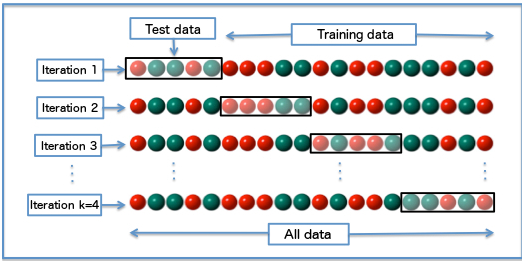




To carry out this undertaking, we had to import the `mean_squared error` and `cross_val_score` arguments from sklearn.

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [31]:
rms = sqrt(mean_squared_error(y_test, y_pred))

The `cv` value is equal to 100 in this case, as we wish to cross validate and obtain an RMSE for our model across 100 different interations.

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(regressor, X, y, cv=100,  scoring='neg_root_mean_squared_error')


array([ -5.3493664 ,  -4.35797255,  -1.33608534,  -1.65625373,
        -0.70207041,  -3.15765688,  -1.78367584,  -1.78200645,
        -2.97686217,  -3.50679975,  -1.3327867 ,  -5.82128109,
        -2.89122578,  -1.70103127,  -2.14477936,  -2.11522187,
        -4.60365737,  -5.53235033,  -4.71847675,  -2.15125847,
        -1.80625339,  -3.99190981,  -2.39635037,  -2.32077648,
        -0.80232622,  -2.02296153,  -1.43363934,  -6.12971214,
        -5.2983632 ,  -3.20141287,  -5.03441392, -10.11269113,
        -6.87974088,  -4.35221507,  -3.82661011,  -5.01943442,
        -7.05848321,  -4.59414777,  -3.1313985 ,  -5.58845963,
        -3.90305371,  -7.02551633,  -2.80979799,  -5.58474483,
        -5.16816086,  -5.34530256,  -4.34361053,  -3.5726907 ,
        -2.73239066,  -6.8609268 ,  -4.78746839,  -5.279481  ,
        -4.73413261,  -2.71942571,  -2.88587895,  -5.64492602,
        -4.07855456,  -2.76827032,  -4.59850742,  -3.76517943,
        -4.37152131,  -4.22794488,  -1.0440426 ,  -1.56

In [30]:
score = cross_val_score(regressor, X, y, cv=100, scoring='neg_root_mean_squared_error')
abs(np.mean(score))

4.246666088812026

This value tells us that the accuracy of our model is actually better than previously thought. As the RMSE for our first model was around 4.85, whilst the newfound and cross-validated RMSE is approximately 4.25. <br> <br> </br>

On that account, we could safely assume that our model's predictions generally deviated around 18.86%  from the actual values, being a slight improvment from before and still encouraging the accuracy of our model.  

<br><br><br><br>
</br>
## <u> Conclusions</u>

Ultimately, the peformance of all our data manipulations and models had revealed to us that:
* Housing variables `CHAS` and `B` did not need to be included during the creation of the dataset, due to their clear lack of assocaition with Boston Housing Prices.
* The housing variables `CRIM`, `NOX` and `INDUS` are areas of concern regarding their affect on Boston Housing Prices. As due to our use of simple linear regression models and RMSE considerations, we could not confidently determine whether or not these three variables are detrimental to the creation of Boston Housing Price prediction models. 
* Inspections of our multiple linear regression model and and it's accuracy when predicting Boston Housing Prices reports to us that linear regression may not be the best model suited to predicting Boston Housing Prices based of the housing variables in the dataset. However, linear regression models still proved able to provide reasonably accurate `PRICE` predictions, even thought they were not exact.
* Further investigation into other models that were applied to the Boston Housing Price dataset by other individuals on Kaggle, divulge that the application of XGBoost Regression or Random Forest regressor lead to the achievement of much more accurate `PRICE` predictions, compard to when linear regression is applied to create a model.